Iniciando a leitura dos arquivos na pasta: C:/Users/livia/OneDrive/Documents/ufc - 2025.2/tcc-Livian/data/dados_orcamentos
  - Arquivo 'dados_2010.csv' lido com sucesso. Valor: 57,300,000.00
  - Arquivo 'dados_2011.csv' lido com sucesso. Valor: 73,300,000.00
  - Arquivo 'dados_2012.csv' lido com sucesso. Valor: 88,221,000.00
  - Arquivo 'dados_2013.csv' lido com sucesso. Valor: 87,436,800.00
  - Arquivo 'dados_2014.csv' lido com sucesso. Valor: 107,055,000.00
  - Arquivo 'dados_2015.csv' lido com sucesso. Valor: 135,747,111.00
  - Arquivo 'dados_2016.csv' lido com sucesso. Valor: 143,920,218.00
  - Arquivo 'dados_2017.csv' lido com sucesso. Valor: 159,606,327.00
  - Arquivo 'dados_2018.csv' lido com sucesso. Valor: 170,778,000.00
  - Arquivo 'dados_2019.csv' lido com sucesso. Valor: 174,193,560.00
  - Arquivo 'dados_2020.csv' lido com sucesso. Valor: 177,000,000.00
  - Arquivo 'dados_2021.csv' lido com sucesso. Valor: 181,700,000.00
  - Arquivo 'dados_2022.csv' lido com sucesso. Valor:

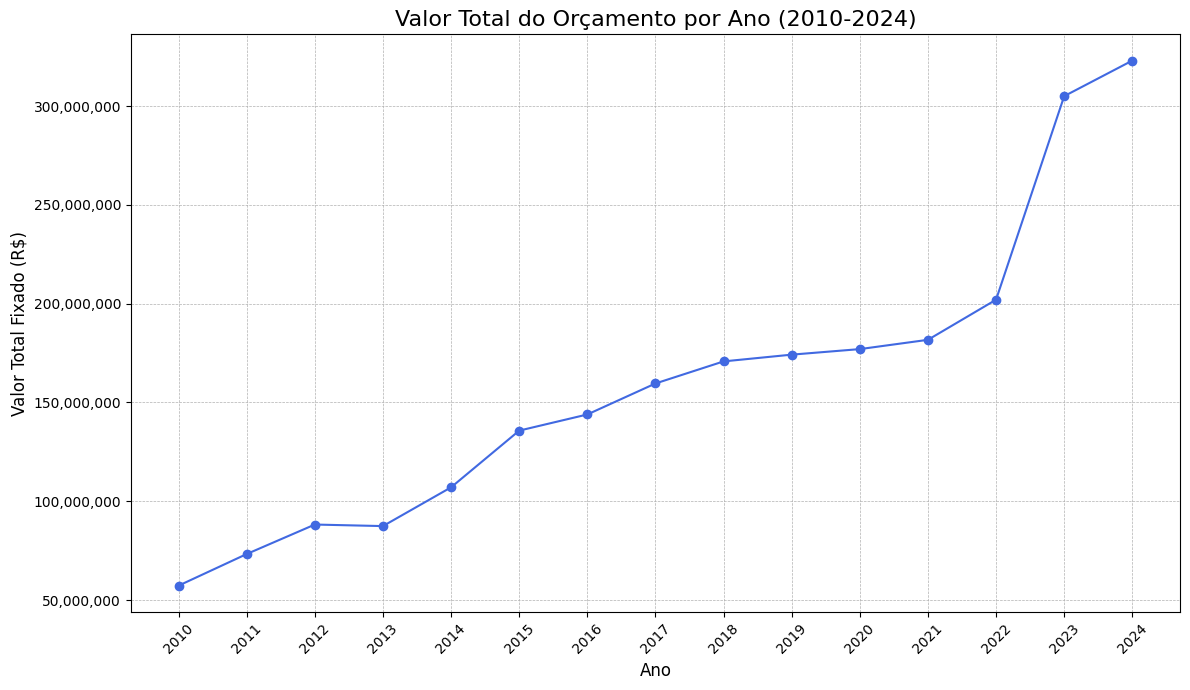

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os


caminho_da_pasta = "C:/Users/livia/OneDrive/Documents/ufc - 2025.2/tcc-Livian/data/dados_orcamentos" 

anos_para_analisar = range(2010, 2025) 

coluna_valor = 'valor_total_fixado_orcamento'


padrao_nome_arquivo = 'dados_{}.csv' 


dados_grafico = {
    "anos": [],
    "valores": []
}

print(f"Iniciando a leitura dos arquivos na pasta: {caminho_da_pasta}")

for ano in anos_para_analisar:
    nome_arquivo = padrao_nome_arquivo.format(ano)
    
    caminho_completo = os.path.join(caminho_da_pasta, nome_arquivo)
    
    if os.path.exists(caminho_completo):
        try:
        
            df = pd.read_csv(caminho_completo)
            
            valor_ano = df[coluna_valor].sum()
            
        
            dados_grafico["anos"].append(ano)
            dados_grafico["valores"].append(valor_ano)
            
        except Exception as e:
            print(f"  - Erro ao processar o arquivo '{nome_arquivo}': {e}")
    else:
        print(f"  - Aviso: Arquivo '{caminho_completo}' não encontrado.")

print("\nLeitura finalizada. Gerando o gráfico...")


if dados_grafico["anos"]:
    plt.figure(figsize=(12, 7))
    plt.plot(dados_grafico["anos"], dados_grafico["valores"], marker='o', linestyle='-', color='royalblue')

    plt.title('Valor Total do Orçamento por Ano (2010-2024)', fontsize=16)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Valor Total Fixado (R$)', fontsize=12)
    
    ax = plt.gca()
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(dados_grafico["anos"], rotation=45)
    plt.tight_layout()

    plt.show()
else:
    print("Nenhum dado foi encontrado. Verifique se o caminho da pasta e os nomes dos arquivos CSV estão corretos.")